In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv(r"D:\Documents\Notes\Miscellaneous\ShareChat Problem data\computation capacity optimization problem - Sheet1.csv")

In [19]:
df

,timestamp,computation capacity being used,Total provisoned load
0,12:01:28 AM,6072,4000
1,12:01:29 AM,5697,4000
2,12:01:38 AM,5807,4000
3,12:03:24 AM,67,4000
4,12:05:12 AM,5895,4000
5,5:38:58 AM,1021,4000
6,5:38:59 AM,912,4000
7,9:25:37 AM,5989,4000
8,9:25:38 AM,2760,4000
9,1:55:00 PM,508,4000


In [20]:
data={'Capacity purchased':[i for i in range(1,13761)], 'Prepaid costs':[i*22 for i in range(1,13761)]}
df_tcost=pd.DataFrame(data)
df_tcost

,Capacity purchased,Prepaid costs
0,1,22
1,2,44
2,3,66
3,4,88
4,5,110
...,...,...
13755,13756,302632
13756,13757,302654
13757,13758,302676
13758,13759,302698


In [21]:
t_excess=[]
for i in range(13760):
    sum_excess=0
    for j in range(22):
        excess=df['computation capacity being used'][j] - df_tcost['Capacity purchased'][i]
        if excess>0:
            sum_excess+=excess
    t_excess.append(sum_excess)

In [22]:
t_excess_cost=[i*2 for i in t_excess]

In [23]:
df_tcost['Excess capacity']=t_excess
df_tcost['Excess capacity cost']=t_excess_cost
df_tcost

,Capacity purchased,Prepaid costs,Excess capacity,Excess capacity cost
0,1,22,83157,166314
1,2,44,83135,166270
2,3,66,83113,166226
3,4,88,83091,166182
4,5,110,83069,166138
...,...,...,...,...
13755,13756,302632,4,8
13756,13757,302654,3,6
13757,13758,302676,2,4
13758,13759,302698,1,2


In [24]:
df_tcost['Total cost']=df_tcost['Excess capacity cost'] + df_tcost['Prepaid costs']
df_tcost

,Capacity purchased,Prepaid costs,Excess capacity,Excess capacity cost,Total cost
0,1,22,83157,166314,166336
1,2,44,83135,166270,166314
2,3,66,83113,166226,166292
3,4,88,83091,166182,166270
4,5,110,83069,166138,166248
...,...,...,...,...,...
13755,13756,302632,4,8,302640
13756,13757,302654,3,6,302660
13757,13758,302676,2,4,302680
13758,13759,302698,1,2,302700


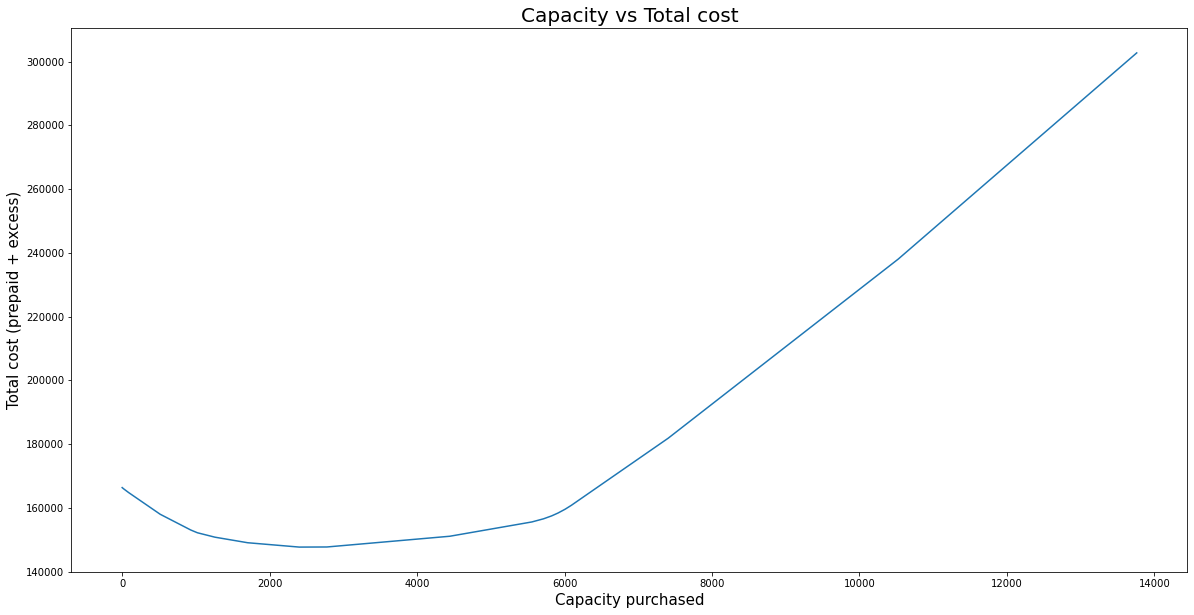

In [25]:
df_cap=df_tcost['Capacity purchased']
df_tc=df_tcost['Total cost']
plt.figure(figsize=(20,10))
plt.xlabel('Capacity purchased', fontsize=15)
plt.ylabel('Total cost (prepaid + excess)', fontsize=15)
plt.title('Capacity vs Total cost', fontsize=20)
plt.plot(df_cap,df_tc)

In [26]:
print('Lowest cost:', df_tcost['Total cost'].min())
df_tcost.loc[df_tcost['Total cost'] == df_tcost['Total cost'].min()]

Lowest cost: 147670


,Capacity purchased,Prepaid costs,Excess capacity,Excess capacity cost,Total cost
2385,2386,52492,47589,95178,147670
2386,2387,52514,47578,95156,147670
2387,2388,52536,47567,95134,147670
2388,2389,52558,47556,95112,147670
2389,2390,52580,47545,95090,147670
...,...,...,...,...,...
2755,2756,60632,43519,87038,147670
2756,2757,60654,43508,87016,147670
2757,2758,60676,43497,86994,147670
2758,2759,60698,43486,86972,147670


Thus we see that the Cost is minimised (=147670) for multiple capacity purchases.

###### Hence we choose the minimum capacity purchased among these in order to maximise the utilisation (thus reducing the wastage of capacity) of capacity which brings us to 2386 of computation capacity being purchased.